Type percentage of training set (between 0 and 100): 70

------------------DATASET SEPARATION: -------------------
Class:  Setosa ----qtd train:  35 ----qtd test:  15
Class:  Versicolor ----qtd train:  35 ----qtd test:  15
Class:  Virginica ----qtd train:  35 ----qtd test:  15


Please input the numbers of components to be used in PCA: 2
-----------------EIGENVECTORS---------------------
[[ 0.36128742 -0.6767112  -0.54414079  0.33977072]
 [-0.09671057 -0.71052401  0.61713145 -0.32396214]
 [ 0.86018136  0.16232072  0.07061052 -0.47828252]
 [ 0.34670807  0.10425719  0.56398025  0.74219285]]
-------------EIGENVECTORS MAIN COMPONENTS---------
[[ 0.36128742 -0.6767112 ]
 [-0.09671057 -0.71052401]
 [ 0.86018136  0.16232072]
 [ 0.34670807  0.10425719]]


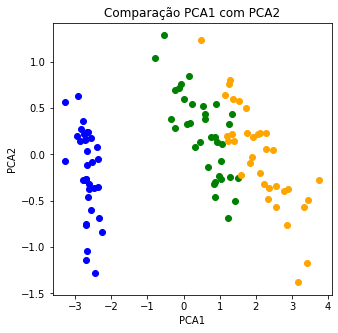

----------------Médias de cada classe:-----------------
Classe setosa:  [-2.67544956 -0.19646695]
Classe Versicolor:  [0.5619523  0.22453361]
Classe Virginica:  [ 2.11349726 -0.02806667]
Media total:  [-1.62832710e-15  1.53349555e-15]
-----------------Calculando Sb-----------------
Sb setosa: 
[[357.9015176   26.28187057]
 [ 26.28187057   1.92996309]]
Sb Versicolor: 
[[15.7895195   6.30885909]
 [ 6.30885909  2.52076721]]
Sb Virginica: 
[[ 2.23343533e+02 -2.96594110e+00]
 [-2.96594110e+00  3.93868874e-02]]
----------------Sw------------------
[[ 50.54996316 -30.49610587]
 [-30.49610587  36.73238433]]
----------------Sb------------------
[[597.03457019  29.62478856]
 [ 29.62478856   4.49011719]]
autovalores:  [25.78140855  0.07546226]
autovetores: 
[[ 0.75608417 -0.05374054]
 [ 0.65447439  0.99855493]]
------------LDA:------------
[[ 0.75608417 -0.05374054]
 [ 0.65447439  0.99855493]]
--------------------final data----------------------


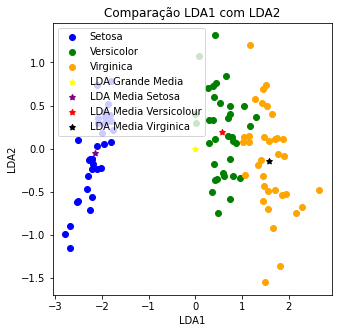

Classificador LDA+PCA:
-----------CONFUSION MATRIX------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy:  0.9777777777777777
---------------------NORMALIZED CONFUSION MATRIX-----------------------


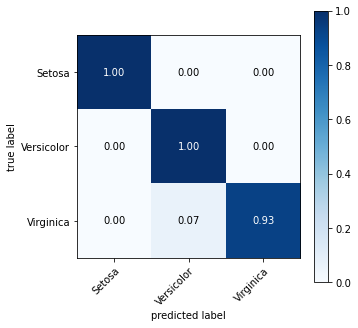

In [79]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from mlxtend.plotting import plot_confusion_matrix
from numpy import linalg as LA

def separate_train_test(variables,classes): #separate classes between train and test
    unique_classes= np.unique(classes)
    train_variables=np.zeros([0,variables.shape[1]])
    test_variables=np.zeros([0,variables.shape[1]])
    train_classes=np.zeros([0,1]) #assumed class is a vector
    test_classes=np.zeros([0,1])  #assumed class is a vector
    
    percentage = int(input("Type percentage of training set (between 0 and 100): "))
    
    for i in range(len(unique_classes)):
        count=0
        amount=np.count_nonzero(classes==unique_classes[i])  # count occurence of class in the vector
        for j in range(len(classes)):        
            if classes[j]==unique_classes[i]:   #builds 1 class at a time
                count+=1
                if count/amount <=percentage/100: #condition if it is forming train set

                    train_variables=np.append(train_variables, [variables[j]],axis = 0)
                    train_classes=np.append(train_classes, [[classes[j]]],axis = 0)
                    
                else: #condition if it is forming test set
                    test_variables=np.append(test_variables, [variables[j]],axis = 0)
                    test_classes=np.append(test_classes, [[classes[j]]],axis = 0)                    
    print('\n------------------DATASET SEPARATION: -------------------')
    for i in range(len(unique_classes)): #loop to print info of each class
        train_qtd=np.count_nonzero(train_classes==unique_classes[i])  #count occurence of class in vector
        test_qtd=np.count_nonzero(test_classes==unique_classes[i])  #count occurence of class in vector
        print("Class: ", unique_classes[i], "----qtd train: ",train_qtd,"----qtd test: ",test_qtd)
    print('\n')                
                    
                    
    return train_variables,test_variables,train_classes,test_classes

def print_confusion_matrix(multiclass,classes_name):
#show confusion matrix:-----------------------------------------
    #logic to make confusion matrix figure
    print('---------------------NORMALIZED CONFUSION MATRIX-----------------------')
    fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                    colorbar=True,
                                    show_absolute=False,
                                    show_normed=True,
                                    class_names=classes_name)
    plt.show()
    return

class PCA:
    
    def __init__(self,input_data):
        
        self.input_data=input_data
        self.output_data=None
        self.eigenvector_comp=None
        self.average=None
        self.positions=None #used to determine position in eingenvector of relevant components
        
        
    def calculate_PCA(self): #calculate PCA based on n_components required
        n_components=int(input("Please input the numbers of components to be used in PCA: "))
        average=np.average(self.input_data, axis=0)
        self.average=average
        data_subtracted=self.input_data-average
        data_subtracted=np.transpose(data_subtracted) #transpose data so matrix covariance can be calculated
        matrixcov=np.cov(data_subtracted) #calculate covariance matrix        
        eigenvalues,eigenvectors=LA.eig(matrixcov) #calculate eigenvalues and eigenvectors
        print('-----------------EIGENVECTORS---------------------')
        print(eigenvectors)
        
        #select eigenvectors based on number of components
        positions=[] #keep the most relevant components
        ordered=np.sort(eigenvalues);
        for i in range(n_components):
            positions.append(np.where(eigenvalues == ordered[-i-1])[0][0])
        
        self.positions=positions;
        eigenvector_comp=np.zeros([eigenvectors.shape[0],len(positions)])
        for i in range(len(positions)):
            for j in range(eigenvectors.shape[0]):
                eigenvector_comp[j][i]=eigenvectors[j][positions[i]]
        print('-------------EIGENVECTORS MAIN COMPONENTS---------')
        print(eigenvector_comp)
        self.eigenvector_comp=eigenvector_comp
        datafinal=np.matmul(np.transpose(data_subtracted), eigenvector_comp)
        self.output_data=datafinal
        return(datafinal)
    
    def rebuild_dataset(self): #Rebuild Dataset based in components selected (original dimension)
        new_dataset_normalized=np.dot(self.output_data, self.eigenvector_comp.T)   
        new_dataset=np.copy(new_dataset_normalized)        
        #sum the averages in dataset to recover offset
        for i in range(self.input_data.shape[0]):
            for j in range(len(self.positions)):
                new_dataset[i][j]+=self.average[j];
        return (new_dataset)
    
    def fit_data(self, new_data): #predicts where new data fits into already created PCA
        data_normalized=new_data-self.average
        data_fit=np.matmul(data_normalized, self.eigenvector_comp)
        
        return (data_fit)

def test_LDA(m_setosa,m_versicolor,m_virginica,m_grandem,eigenvector,test_variables, test_set):
    actual=[] #create list to hold right answers
    predicted=[] #create list to hold answers predicted
       
    for i in range(len(test_variables)): #finds predicted class for each test_class
        predicted.append(test_variables[i].dot(eigenvector))
    print(predicted)
        
        
        
#Begin---------------------------------------       
data=pd.read_csv('iris.csv') #load dataset
variables= data.loc[:, ["sepal.length", "sepal.width", "petal.length", "petal.width"]].values
classifications= data.loc[:, ["species"]].values.flatten()
z=separate_train_test(variables,classifications) # separate dataset train/test sets

do_pca=PCA(z[0])
ValoresIndiscriminados=do_pca.calculate_PCA()
setosa, versicolor,virginica=np.split(ValoresIndiscriminados,3)

plt.scatter(setosa[:,0],setosa[:,1],color='blue', label='Setosa')
plt.scatter(versicolor[:,0],versicolor[:,1],color='green', label='Versicolor')
plt.scatter(virginica[:,0],virginica[:,1],color='orange', label='Virginica')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("Comparação PCA1 com PCA2")
plt.show()

Classes=data.loc[:, ["species"]]
Setosa,Versicolor, Virginica=np.array_split(Classes, 3)
Classe1, Classe2, Classe3=np.array_split(ValoresIndiscriminados, 3)
Classe1original=np.copy(Classe1)
Classe2original=np.copy(Classe2)
Classe3original=np.copy(Classe3)

#Calculando médias das classes
Mediaclasse1=np.mean(Classe1, axis=0)
Mediaclasse2=np.mean(Classe2, axis=0)
Mediaclasse3=np.mean(Classe3, axis=0)
print('----------------Médias de cada classe:-----------------')
print('Classe setosa: ',Mediaclasse1)
print('Classe Versicolor: ',Mediaclasse2)
print('Classe Virginica: ',Mediaclasse3)

#Subtraindo médias das classes
for i in range(len(Classe1)):
    Classe1[i]= Classe1[i]-Mediaclasse1
    Classe2[i]= Classe2[i]-Mediaclasse2
    Classe3[i]= Classe3[i]-Mediaclasse3

#Calculando matriz de covariancia de cada classe
Classe1cov=np.cov(Classe1.T)
Classe2cov=np.cov(Classe2.T)
Classe3cov=np.cov(Classe3.T)

#Somando matrizes de covariancia
Sw=50*(Classe1cov+Classe2cov+Classe3cov)

#Somando todas as médias
Mediatotal=(Mediaclasse1+Mediaclasse2+Mediaclasse3)/3
print('Media total: ', Mediatotal)

#Calculando a diferença das médias parciais para a média total
print('-----------------Calculando Sb-----------------')
S1=50*(np.c_[Mediaclasse1-Mediatotal]).T*np.c_[(Mediaclasse1-Mediatotal)]
S2=50*(np.c_[Mediaclasse2-Mediatotal]).T*np.c_[(Mediaclasse2-Mediatotal)]
S3=50*(np.c_[Mediaclasse3-Mediatotal]).T*np.c_[(Mediaclasse3-Mediatotal)]
print('Sb setosa: ')
print(S1)
print('Sb Versicolor: ')
print(S2)
print('Sb Virginica: ')
print(S3)

#Somando todos os S encontrados
Sb=(S1+S2+S3) 

print('----------------Sw------------------')
print(Sw)
print('----------------Sb------------------')
print(Sb)

#Calculando Sw(elevado a -1) *Sb
#Matriz=np.linalg.inv(Sw).dot(Sb)
Swinv=np.linalg.inv(Sw)
Matriz=np.matmul(Swinv,Sb)

eigenvalues,eigenvectors=LA.eig(Matriz)
    
print('autovalores: ', eigenvalues)
print('autovetores: ')
print(eigenvectors)

#selecionando componentes
maior=0
for i in range(len(eigenvalues)):
    if(abs(eigenvalues[i])>abs(eigenvalues[i])):
        maior=i

eigenvalue= eigenvalues[maior:maior+2]
eigenvector=eigenvectors[:,maior:maior+2]
print('------------LDA:------------')
print(eigenvector)


 #criando vetor finaldata
print('--------------------final data----------------------')
finaldata1= Classe1original.dot(eigenvector)
finaldata2= Classe2original.dot(eigenvector)
finaldata3= Classe3original.dot(eigenvector) 
Mediafinal_ajustada=Mediatotal.dot(eigenvector)
Mediaclasse1_ajustada=Mediaclasse1.dot(eigenvector)
Mediaclasse2_ajustada=Mediaclasse2.dot(eigenvector)
Mediaclasse3_ajustada=Mediaclasse3.dot(eigenvector)

plt.scatter(finaldata1[:,0],finaldata1[:,1],color='blue', label='Setosa')
plt.scatter(finaldata2[:,0],finaldata2[:,1],color='green', label='Versicolor')
plt.scatter(finaldata3[:,0],finaldata3[:,1],color='orange', label='Virginica')
plt.scatter(Mediafinal_ajustada[0],Mediafinal_ajustada[1],c='yellow',marker=(5, 1),label="LDA Grande Media")
plt.scatter(Mediaclasse1_ajustada[0],Mediaclasse1_ajustada[1],c='purple',marker=(5, 1),label="LDA Media Setosa")
plt.scatter(Mediaclasse2_ajustada[0],Mediaclasse2_ajustada[1],c='red',marker=(5, 1),label="LDA Media Versicolour")
plt.scatter(Mediaclasse3_ajustada[0],Mediaclasse3_ajustada[1],c='black',marker=(5, 1),label="LDA Media Virginica")

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title("Comparação LDA1 com LDA2")

plt.legend()
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (5 ,5)
plt.show()


print('Classificador LDA+PCA:')
#a=test_LDA(Mediaclasse1_ajustada,Mediaclasse2_ajustada,Mediaclasse3_ajustada,Mediafinal_ajustada,eigenvector,z[1], z[3])
actual=[] #create list to hold right answers
predicted=[] #create list to hold answers predicted
predicted_clases=[] #create list with answers, index representing setosa, virginica and versicolor

#Predict Results-----------------------
for i in range(len(z[1])): #finds predicted class for each test_class
    test=do_pca.fit_data(z[1][i])
    predicted.append(np.ndarray.tolist(test.dot(eigenvector)))

#Classify predicted results--------------------
for i in range(len(z[1])): #finds predicted class for each test_class
    if(predicted[i][0]<=((Mediafinal_ajustada[0]+Mediaclasse1_ajustada[0])/2)):
        predicted_clases.append(0) #classe setosa   
    elif(predicted[i][0]<=((Mediaclasse2_ajustada[0]+Mediaclasse3_ajustada[0])/2)):
        predicted_clases.append(1) #classe versicolour 
    else:
        predicted_clases.append(2) #classe virginica

#show confusion matrix:-----------------------------------------
classes_name=np.unique(z[3])
from sklearn.metrics import confusion_matrix
#converting classes to numbers:
for i in range(len(classes_name)):
    for j in range(len(z[3])):
        if (classes_name[i]==z[3][j][0]):
            actual.append(i)
multiclass=np.array(confusion_matrix(actual, predicted_clases))#create numpy array with confusion matrix
print("-----------CONFUSION MATRIX------------")
print(multiclass)
#calculating accuracy
correct=0
for i in range(len(actual)):
    if actual[i]==predicted_clases[i]:
        correct+=1
accuracy=correct/len(actual)
print('Accuracy: ',accuracy)
print_confusion_matrix(multiclass,classes_name)
